In [20]:
## env setup
# %env OPENAI_API_KEY = insert_openai_api_key_here
# %pip install openai
# %pip install networkx
%pip install matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/28/ba/8be09886eb56ac04a218a1dc3fa728a5c4cac60b019b4f1687885166da00/matplotlib-3.9.2-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/67/71/1e6e95aee21a500415f5d2dbf037bf4567529b6a4e986594d7026ec5ae90/contourpy-1.3.1-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/17/50/75461e050ded02b9eaa8097df52c2a8752cf4c24db8b44b150755b76c8f1/fonttools-4.55.0-cp311-cp311-macosx_10_9_universal2.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.5/164.5 kB 8.4 MB/s eta 0:00:00
  Obtaining dependency informati

In [ ]:
import networkx as nx
from openai import OpenAI
import json

# Initialize the OpenAI client
client = OpenAI()

# Initialize the graph
G = nx.Graph()

In [5]:
completion = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
        {"role": "system", "content": "You are a helpful assistant."},
        {
            "role": "user",
            "content": "Write a haiku about recursion in programming."
        }
    ]
)

print(completion.choices[0].message)

completion = client.chat.completions.create(
    model="gpt-4o",
    messages=[
        {
            "role": "user",
            "content": [
                {"type": "text", "text": "What's in this image?"},
                {
                    "type": "image_url",
                    "image_url": {
                        "url": "https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Gfp-wisconsin-madison-the-nature-boardwalk.jpg/2560px-Gfp-wisconsin-madison-the-nature-boardwalk.jpg",
                    }
                },
            ],
        }
    ],
)

print(completion.choices[0].message)

from openai import OpenAI
client = OpenAI()

response = client.chat.completions.create(
    model="gpt-4o-2024-08-06",
    messages=[
        {
            "role": "system", 
            "content": "You extract email addresses into JSON data."
        },
        {
            "role": "user", 
            "content": "Feeling stuck? Send a message to help@mycompany.com."
        }
    ],
    response_format={
        "type": "json_schema",
        "json_schema": {
            "name": "email_schema",
            "schema": {
                "type": "object",
                "properties": {
                    "email": {
                        "description": "The email address that appears in the input",
                        "type": "string"
                    },
                    "additionalProperties": False
                }
            }
        }
    }
)

print(response.choices[0].message.content);

ChatCompletionMessage(content='Looping through the past,  \nFunctions call their own shadows—  \nDepths of thought unfold.', refusal=None, role='assistant', audio=None, function_call=None, tool_calls=None)


In [10]:
from openai import OpenAI
client = OpenAI()

# Input data
rubrics = "Give me the connectivity score of these two artworks"

artwork_a = {
    "name": "Tapestry of Justice",
    "artist": "Wong Hoy Cheong",
    "description": '''Wong Hoy Cheong
Tapestry of Justice
1999–2004

Thumbprints, petals and leaves; 2000 x 89 cm

Over 10,000 photocopied thumbprints are connected into a delicate tapestry, punctuated with leaves and petals from plants, such as the hibiscus (Malaysia’s national flower), rose and beech. The artist conceived this installation to serve simultaneously as a work of art and a petition. This was during Malaysia’s late 1990s Reformasi movement, when the redress of social injustices and other political issues held sway. For the next six years, the artist collected the thumbprints shown here to repeal the nation’s Internal Security Act, which allowed for detention without trial. The dual symbolism of thumbprints is ironic—conventionally viewed as evidential of criminal activity, the thumbprint was also the most reliable form of personal identification before the advent of DNA sequencing. Fragile and hopeful, the tapestry emphasises the power of collective effort in effecting transformation.''',
    "imageurl": "https://www.singaporeartmuseum.sg/-/media/SAM/Images/Everyday-Practices/artwork/Wong-Hoy-Cheong-1920-x-1440.png?w=1920&hash=6A71EDDAC1EDC66BD5B6A24B057A7550"
}

artwork_b = {
    "name": "Peripheral Ritual I–III",
    "artist": "Guo-Liang Tan",
    "description": '''Guo-Liang Tan
Peripheral Ritual I–III
2018

Acrylic on aeronautical fabric stretched over wood; 163 x 408 cm

Peripheral Ritual I–III consists of three paintings that were created separately but are here presented as a triptych. Across the panels, thinned paint is allowed to flow, diffuse and spread without direct brush contact. This method, applied to the slightly water-resistant aeronautical fabric surfaces, produces stains and marks that appear accidental. They are, however, meticulously composed through a process akin to choreography. The artist describes his approach as using his “own body to respond to the painting as objects,” employing gestures such as shifting, tilting and turning. This physicality of the paintings is also asserted by the wooden stretcher bars that are visible through the translucent fabric. The amorphous hues evoke the appearance of bruised skin and suggest the body’s capacity to endure.''',
    "imageurl": "https://www.singaporeartmuseum.sg/-/media/SAM/Images/Everyday-Practices/artwork/GuoLiang-Tan--1920-x-1440.png?w=1920&hash=A7DDCF23E6A129CF126F1E5FB7DE2E51"
}

# Prepare the messages
messages = [
    {
        "role": "system",
        "content": "You are an art expert who evaluates the connectivity between two artworks based on their visual and narrative aspects."
    },
    {
        "role": "user",
        "content": [
            {"type": "text", "text": rubrics},
            {"type": "text", "text": f"Artwork A: {artwork_a['name']} by {artwork_a['artist']}"},
            {"type": "text", "text": "Description:"},
            {"type": "text", "text": artwork_a["description"]},
            {"type": "image_url", "image_url": {"url": artwork_a["imageurl"]}},
            {"type": "text", "text": f"Artwork B: {artwork_b['name']} by {artwork_b['artist']}"},
            {"type": "text", "text": "Description:"},
            {"type": "text", "text": artwork_b["description"]},
            {"type": "image_url", "image_url": {"url": artwork_b["imageurl"]}},
        ]
    }
]

# Define the response format using JSON schema
response_format = {
    "type": "json_schema",
    "json_schema": {
        "name": "connectivity_score_schema",
        "schema": {
            "type": "object",
            "properties": {
                "visual_connectivity_score": {
                    "type": "number",
                    "description": "The visual connectivity score between the two artworks"
                },
                "visual_reasoning": {
                    "type": "string",
                    "description": "Reasoning for the visual connectivity score"
                },
                "narrative_connectivity_score": {
                    "type": "number",
                    "description": "The narrative connectivity score between the two artworks"
                },
                "narrative_reasoning": {
                    "type": "string",
                    "description": "Reasoning for the narrative connectivity score"
                }
            },
            "required": [
                "visual_connectivity_score",
                "visual_reasoning",
                "narrative_connectivity_score",
                "narrative_reasoning"
            ],
            "additionalProperties": False
        }
    }
}

# Create the chat completion
completion = client.chat.completions.create(
    model="gpt-4o",
    messages=messages,
    response_format=response_format
)

# Output the result
print(completion.choices[0].message.content)


{"visual_connectivity_score":2,"visual_reasoning":"The visual styles of the artworks differ significantly. 'Tapestry of Justice' is a detailed, intricate composition using thumbprints, petals, and leaves, forming a textured tapestry. In contrast, 'Peripheral Ritual I–III' features abstract, fluid forms with diffused hues on fabric. The first is dense and patterned, while the latter is loose and free-flowing, leading to a low visual connectivity.","narrative_connectivity_score":4,"narrative_reasoning":"Both artworks engage with themes of process and transformation. 'Tapestry of Justice' documents a socio-political movement and collective action for change, whereas 'Peripheral Ritual I–III' explores the process and physicality in painting. Both focus on transformation and endurance—one socio-political, the other physical—creating a moderate narrative connection."}


In [18]:
# Input data
rubrics = "Give me the connectivity score of these two artworks"

artwork_a = {
    "name": "Tapestry of Justice",
    "artist": "Wong Hoy Cheong",
    "description": '''Wong Hoy Cheong
Tapestry of Justice
1999–2004

Thumbprints, petals and leaves; 2000 x 89 cm

Over 10,000 photocopied thumbprints are connected into a delicate tapestry, punctuated with leaves and petals from plants, such as the hibiscus (Malaysia’s national flower), rose and beech. The artist conceived this installation to serve simultaneously as a work of art and a petition. This was during Malaysia’s late 1990s Reformasi movement, when the redress of social injustices and other political issues held sway. For the next six years, the artist collected the thumbprints shown here to repeal the nation’s Internal Security Act, which allowed for detention without trial. The dual symbolism of thumbprints is ironic—conventionally viewed as evidential of criminal activity, the thumbprint was also the most reliable form of personal identification before the advent of DNA sequencing. Fragile and hopeful, the tapestry emphasises the power of collective effort in effecting transformation.''',
    "imageurl": "https://www.singaporeartmuseum.sg/-/media/SAM/Images/Everyday-Practices/artwork/Wong-Hoy-Cheong-1920-x-1440.png?w=1920&hash=6A71EDDAC1EDC66BD5B6A24B057A7550"
}

artwork_b = {
    "name": "Peripheral Ritual I–III",
    "artist": "Guo-Liang Tan",
    "description": '''Guo-Liang Tan
Peripheral Ritual I–III
2018

Acrylic on aeronautical fabric stretched over wood; 163 x 408 cm

Peripheral Ritual I–III consists of three paintings that were created separately but are here presented as a triptych. Across the panels, thinned paint is allowed to flow, diffuse and spread without direct brush contact. This method, applied to the slightly water-resistant aeronautical fabric surfaces, produces stains and marks that appear accidental. They are, however, meticulously composed through a process akin to choreography. The artist describes his approach as using his “own body to respond to the painting as objects,” employing gestures such as shifting, tilting and turning. This physicality of the paintings is also asserted by the wooden stretcher bars that are visible through the translucent fabric. The amorphous hues evoke the appearance of bruised skin and suggest the body’s capacity to endure.''',
    "imageurl": "https://www.singaporeartmuseum.sg/-/media/SAM/Images/Everyday-Practices/artwork/GuoLiang-Tan--1920-x-1440.png?w=1920&hash=A7DDCF23E6A129CF126F1E5FB7DE2E51"
}

# Prepare the messages
messages = [
    {
        "role": "system",
        "content": "You are an art expert who evaluates the connectivity between two artworks based on their visual and narrative aspects."
    },
    {
        "role": "user",
        "content": [
            {"type": "text", "text": rubrics},
            {"type": "text", "text": f"Artwork A: {artwork_a['name']} by {artwork_a['artist']}"},
            {"type": "text", "text": "Description:"},
            {"type": "text", "text": artwork_a["description"]},
            {"type": "image_url", "image_url": {"url": artwork_a["imageurl"]}},
            {"type": "text", "text": f"Artwork B: {artwork_b['name']} by {artwork_b['artist']}"},
            {"type": "text", "text": "Description:"},
            {"type": "text", "text": artwork_b["description"]},
            {"type": "image_url", "image_url": {"url": artwork_b["imageurl"]}},
        ]
    }
]

# Define the response format using JSON schema
response_format = {
    "type": "json_schema",
    "json_schema": {
        "name": "connectivity_score_schema",
        "schema": {
            "type": "object",
            "properties": {
                "visual_connectivity_score": {
                    "type": "number",
                    "description": "The visual connectivity score between the two artworks"
                },
                "visual_reasoning": {
                    "type": "string",
                    "description": "Reasoning for the visual connectivity score"
                },
                "narrative_connectivity_score": {
                    "type": "number",
                    "description": "The narrative connectivity score between the two artworks"
                },
                "narrative_reasoning": {
                    "type": "string",
                    "description": "Reasoning for the narrative connectivity score"
                }
            },
            "required": [
                "visual_connectivity_score",
                "visual_reasoning",
                "narrative_connectivity_score",
                "narrative_reasoning"
            ],
            "additionalProperties": False
        }
    }
}

# Create the chat completion
completion = client.chat.completions.create(
    model="gpt-4o",
    messages=messages,
    response_format=response_format
)

# Parse the JSON response
response_content = completion.choices[0].message.content
connectivity_data = json.loads(response_content)

# Add artworks as nodes to the graph if they don't exist
for artwork in [artwork_a, artwork_b]:
    if not G.has_node(artwork['name']):
        G.add_node(artwork['name'], artist=artwork['artist'], description=artwork['description'], imageurl=artwork['imageurl'])

# Add edge with connectivity scores if it doesn't exist
if not G.has_edge(artwork_a['name'], artwork_b['name']):
    G.add_edge(
        artwork_a['name'],
        artwork_b['name'],
        visual_connectivity_score=connectivity_data['visual_connectivity_score'],
        visual_reasoning=connectivity_data['visual_reasoning'],
        narrative_connectivity_score=connectivity_data['narrative_connectivity_score'],
        narrative_reasoning=connectivity_data['narrative_reasoning']
    )

# Output the graph nodes and edges
print("Nodes in the graph:")
for node in G.nodes(data=True):
    print(node)

print("\nEdges in the graph:")
for edge in G.edges(data=True):
    print(edge)


Nodes in the graph:
('Tapestry of Justice', {'artist': 'Wong Hoy Cheong', 'description': 'Wong Hoy Cheong\nTapestry of Justice\n1999–2004\n\nThumbprints, petals and leaves; 2000 x 89 cm\n\nOver 10,000 photocopied thumbprints are connected into a delicate tapestry, punctuated with leaves and petals from plants, such as the hibiscus (Malaysia’s national flower), rose and beech. The artist conceived this installation to serve simultaneously as a work of art and a petition. This was during Malaysia’s late 1990s Reformasi movement, when the redress of social injustices and other political issues held sway. For the next six years, the artist collected the thumbprints shown here to repeal the nation’s Internal Security Act, which allowed for detention without trial. The dual symbolism of thumbprints is ironic—conventionally viewed as evidential of criminal activity, the thumbprint was also the most reliable form of personal identification before the advent of DNA sequencing. Fragile and hopef

In [26]:
import networkx as nx
from openai import OpenAI
import json
import os
from itertools import combinations
from networkx.readwrite import json_graph

# Initialize the OpenAI client
client = OpenAI()

# Initialize or load the graph
graph_file = 'artworks_graph.json'

if os.path.exists(graph_file):
    # Load the graph from JSON
    with open(graph_file, 'r') as f:
        data = json.load(f)
        G = json_graph.node_link_graph(data)
else:
    # Initialize an empty graph
    G = nx.Graph()

# Input data
rubrics = "Give me the connectivity score of these two artworks"

# Artworks data
artworks = [
    {
        "name": "Tapestry of Justice",
        "artist": "Wong Hoy Cheong",
        "description": '''Wong Hoy Cheong
Tapestry of Justice
1999–2004

Thumbprints, petals and leaves; 2000 x 89 cm

Over 10,000 photocopied thumbprints are connected into a delicate tapestry, punctuated with leaves and petals from plants, such as the hibiscus (Malaysia’s national flower), rose and beech. The artist conceived this installation to serve simultaneously as a work of art and a petition. This was during Malaysia’s late 1990s Reformasi movement, when the redress of social injustices and other political issues held sway. For the next six years, the artist collected the thumbprints shown here to repeal the nation’s Internal Security Act, which allowed for detention without trial. The dual symbolism of thumbprints is ironic—conventionally viewed as evidential of criminal activity, the thumbprint was also the most reliable form of personal identification before the advent of DNA sequencing. Fragile and hopeful, the tapestry emphasises the power of collective effort in effecting transformation.''',
        "imageurl": "https://www.singaporeartmuseum.sg/-/media/SAM/Images/Everyday-Practices/artwork/Wong-Hoy-Cheong-1920-x-1440.png?w=1920&hash=6A71EDDAC1EDC66BD5B6A24B057A7550"
    },
    {
        "name": "Peripheral Ritual I–III",
        "artist": "Guo-Liang Tan",
        "description": '''Guo-Liang Tan
Peripheral Ritual I–III
2018

Acrylic on aeronautical fabric stretched over wood; 163 x 408 cm

Peripheral Ritual I–III consists of three paintings that were created separately but are here presented as a triptych. Across the panels, thinned paint is allowed to flow, diffuse and spread without direct brush contact. This method, applied to the slightly water-resistant aeronautical fabric surfaces, produces stains and marks that appear accidental. They are, however, meticulously composed through a process akin to choreography. The artist describes his approach as using his “own body to respond to the painting as objects,” employing gestures such as shifting, tilting and turning. This physicality of the paintings is also asserted by the wooden stretcher bars that are visible through the translucent fabric. The amorphous hues evoke the appearance of bruised skin and suggest the body’s capacity to endure.''',
        "imageurl": "https://www.singaporeartmuseum.sg/-/media/SAM/Images/Everyday-Practices/artwork/GuoLiang-Tan--1920-x-1440.png?w=1920&hash=A7DDCF23E6A129CF126F1E5FB7DE2E51"
    },
    {
        "name": "The Flower Field",
        "artist": "Imhathai Suwatthanasilp",
        "description": '''Imhathai Suwatthanasilp
The Flower Field
2012

Hair, bed frame, acrylic sheets and LED lights; 100 x 210 x 57 cm

In this field of bright white light, thousands of intricate flowers seem to float. Ethereal and idyllic, they evoke a utopian realm of rest and reward, like Elysium. On closer look, the fuzzy flowers are found to be meticulously handspun balls of hair, specifically the hair shorn of cancer patients, survivors and donors in the Hair for Hope charity programme. These are arranged on a lightbox that Imhathai Suwatthanasilp had repurposed from a bed frame. Starkly backlit, the strands offer a tender tribute to the resilience of the human spirit. Imhathai dedicates her craftsmanship towards a message of hope for a brighter future.''',
        "imageurl": "https://www.singaporeartmuseum.sg/-/media/SAM/Images/Everyday-Practices/artwork/Imhathai--1920-x-1440.png?w=1920&hash=9CA10C38D8088607CB6FCB403DF91DAD"
    },
    {
        "name": "The Internalised Self series (Atlas, Apollo, Icarus, Ganymede)",
        "artist": "Jerome Kugan",
        "description": '''Jerome Kugan
The Internalised Self series (Atlas, Apollo, Icarus, Ganymede)
2018

Watercolour and pencil on used HIV-medication packaging paper; Various dimensions

Ambiguous, androgynous figures devoid of genitalia and hair are depicted against crimson backgrounds, on recycled carton packages of antiretroviral drugs. The medication gestures to the artist’s HIV-positive status, rendering this series deeply autobiographical. Striking dramatic poses, the figures mime the Greek myths of Ganymede, Atlas, Icarus and Apollo, after how they are typically portrayed in early history paintings: Ganymede, desired for his youthful beauty, was abducted by Zeus in the guise of an eagle, and became both immortal cupbearer and the object of Zeus’s desire; Atlas, punished for siding with the losing side in the Titan-Olympian war, was burdened with the weight of heavens for eternity; Icarus plunged into the sea after soaring too close to the sun despite his father’s advice; Apollo, god of the sun, whose charisma masked an egoistic, jealous and sometimes vengeful nature. The fates and symbolism of these four characters resonate with Kugan’s sense of the tragedy and irony of his own predicament.''',
        "imageurl": "https://www.singaporeartmuseum.sg/-/media/SAM/Images/Everyday-Practices/artwork/Jerome--1920-x-1440.png?w=1920&hash=723B1B040320BB8285231F877CE1A95B"
    }
]

# Add artworks as nodes if not already present
for artwork in artworks:
    if not G.has_node(artwork['name']):
        G.add_node(
            artwork['name'],
            artist=artwork['artist'],
            description=artwork['description'],
            imageurl=artwork['imageurl']
        )

# Generate all unique pairs of artworks
artwork_pairs = list(combinations(artworks, 2))

# For each pair, compute connectivity scores if edge does not exist
for artwork_a, artwork_b in artwork_pairs:
    if not G.has_edge(artwork_a['name'], artwork_b['name']):
        # Prepare the messages
        messages = [
            {
                "role": "system",
                "content": "You are an art expert who evaluates the connectivity between two artworks based on their visual and narrative aspects."
            },
            {
                "role": "user",
                "content": [
                    {"type": "text", "text": rubrics},
                    {"type": "text", "text": f"Artwork A: {artwork_a['name']} by {artwork_a['artist']}"},
                    {"type": "text", "text": "Description:"},
                    {"type": "text", "text": artwork_a["description"]},
                    {"type": "image_url", "image_url": {"url": artwork_a["imageurl"]}},
                    {"type": "text", "text": f"Artwork B: {artwork_b['name']} by {artwork_b['artist']}"},
                    {"type": "text", "text": "Description:"},
                    {"type": "text", "text": artwork_b["description"]},
                    {"type": "image_url", "image_url": {"url": artwork_b["imageurl"]}},
                ]
            }
        ]
        # Define the response format using JSON schema
        response_format = {
            "type": "json_schema",
            "json_schema": {
                "name": "connectivity_score_schema",
                "schema": {
                    "type": "object",
                    "properties": {
                        "visual_connectivity_score": {
                            "type": "number",
                            "description": "The visual connectivity score between the two artworks"
                        },
                        "visual_reasoning": {
                            "type": "string",
                            "description": "Reasoning for the visual connectivity score"
                        },
                        "narrative_connectivity_score": {
                            "type": "number",
                            "description": "The narrative connectivity score between the two artworks"
                        },
                        "narrative_reasoning": {
                            "type": "string",
                            "description": "Reasoning for the narrative connectivity score"
                        }
                    },
                    "required": [
                        "visual_connectivity_score",
                        "visual_reasoning",
                        "narrative_connectivity_score",
                        "narrative_reasoning"
                    ],
                    "additionalProperties": False
                }
            }
        }
        # Create the chat completion
        completion = client.chat.completions.create(
            model="gpt-4o",
            messages=messages,
            response_format=response_format
        )
        # Parse the JSON response
        response_content = completion.choices[0].message.content
        connectivity_data = json.loads(response_content)
        # Add edge with connectivity scores
        G.add_edge(
            artwork_a['name'],
            artwork_b['name'],
            visual_connectivity_score=connectivity_data['visual_connectivity_score'],
            visual_reasoning=connectivity_data['visual_reasoning'],
            narrative_connectivity_score=connectivity_data['narrative_connectivity_score'],
            narrative_reasoning=connectivity_data['narrative_reasoning']
        )

# Save the graph to JSON
data = json_graph.node_link_data(G)  # Node-link format to serialize

with open(graph_file, 'w') as f:
    json.dump(data, f)

# Output the graph nodes and edges
print("Nodes in the graph:")
for node in G.nodes(data=True):
    print(node)

print("\nEdges in the graph:")
for edge in G.edges(data=True):
    print(edge)


Nodes in the graph:
('Tapestry of Justice', {'artist': 'Wong Hoy Cheong', 'description': 'Wong Hoy Cheong\nTapestry of Justice\n1999–2004\n\nThumbprints, petals and leaves; 2000 x 89 cm\n\nOver 10,000 photocopied thumbprints are connected into a delicate tapestry, punctuated with leaves and petals from plants, such as the hibiscus (Malaysia’s national flower), rose and beech. The artist conceived this installation to serve simultaneously as a work of art and a petition. This was during Malaysia’s late 1990s Reformasi movement, when the redress of social injustices and other political issues held sway. For the next six years, the artist collected the thumbprints shown here to repeal the nation’s Internal Security Act, which allowed for detention without trial. The dual symbolism of thumbprints is ironic—conventionally viewed as evidential of criminal activity, the thumbprint was also the most reliable form of personal identification before the advent of DNA sequencing. Fragile and hopef

Graph loaded from artworks_graph.json
Node already exists: Tapestry of Justice
Node already exists: Peripheral Ritual I–III
Node already exists: The Flower Field
Node already exists: The Internalised Self series (Atlas, Apollo, Icarus, Ganymede)
Graph saved to artworks_graph.json


ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

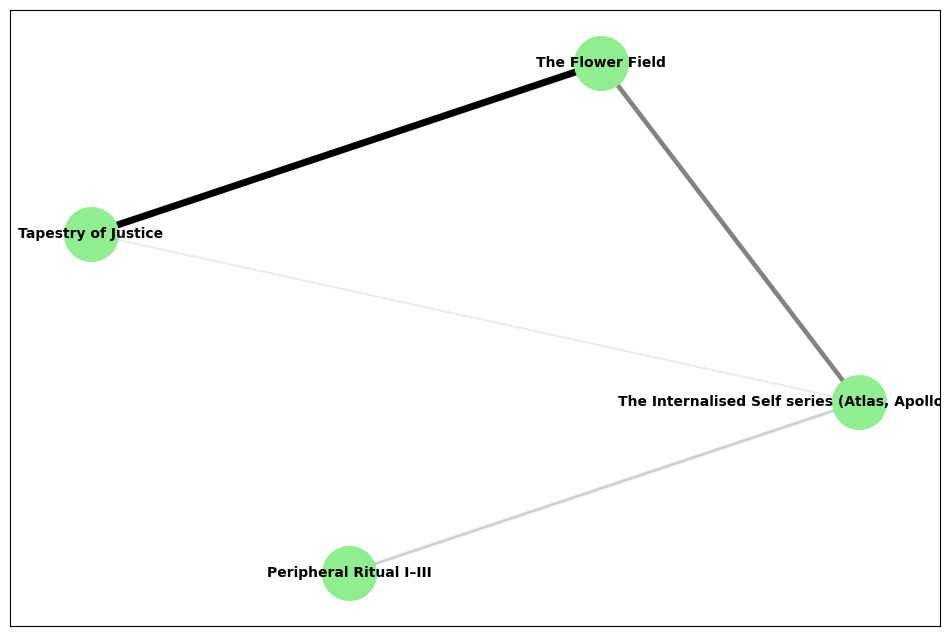

In [33]:
import networkx as nx
from openai import OpenAI
import json
import os
from itertools import combinations
from networkx.readwrite import json_graph
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as mcolors

# Initialize the OpenAI client
client = OpenAI()

# Initialize or load the graph
graph_file = 'artworks_graph.json'

if os.path.exists(graph_file):
    # Load the graph from JSON
    with open(graph_file, 'r') as f:
        data = json.load(f)
        G = json_graph.node_link_graph(data)
    print(f"Graph loaded from {graph_file}")
else:
    # Initialize an empty graph
    G = nx.Graph()
    print("Initialized a new graph.")

# Input data
rubrics = "Give me the connectivity score of these two artworks"

# Artworks data
artworks = [
    {
        "name": "Tapestry of Justice",
        "artist": "Wong Hoy Cheong",
        "description": '''Wong Hoy Cheong
Tapestry of Justice
1999–2004

Thumbprints, petals and leaves; 2000 x 89 cm

Over 10,000 photocopied thumbprints are connected into a delicate tapestry, punctuated with leaves and petals from plants, such as the hibiscus (Malaysia’s national flower), rose and beech. The artist conceived this installation to serve simultaneously as a work of art and a petition. This was during Malaysia’s late 1990s Reformasi movement, when the redress of social injustices and other political issues held sway. For the next six years, the artist collected the thumbprints shown here to repeal the nation’s Internal Security Act, which allowed for detention without trial. The dual symbolism of thumbprints is ironic—conventionally viewed as evidential of criminal activity, the thumbprint was also the most reliable form of personal identification before the advent of DNA sequencing. Fragile and hopeful, the tapestry emphasises the power of collective effort in effecting transformation.''',
        "imageurl": "https://www.singaporeartmuseum.sg/-/media/SAM/Images/Everyday-Practices/artwork/Wong-Hoy-Cheong-1920-x-1440.png?w=1920&hash=6A71EDDAC1EDC66BD5B6A24B057A7550"
    },
    {
        "name": "Peripheral Ritual I–III",
        "artist": "Guo-Liang Tan",
        "description": '''Guo-Liang Tan
Peripheral Ritual I–III
2018

Acrylic on aeronautical fabric stretched over wood; 163 x 408 cm

Peripheral Ritual I–III consists of three paintings that were created separately but are here presented as a triptych. Across the panels, thinned paint is allowed to flow, diffuse and spread without direct brush contact. This method, applied to the slightly water-resistant aeronautical fabric surfaces, produces stains and marks that appear accidental. They are, however, meticulously composed through a process akin to choreography. The artist describes his approach as using his “own body to respond to the painting as objects,” employing gestures such as shifting, tilting and turning. This physicality of the paintings is also asserted by the wooden stretcher bars that are visible through the translucent fabric. The amorphous hues evoke the appearance of bruised skin and suggest the body’s capacity to endure.''',
        "imageurl": "https://www.singaporeartmuseum.sg/-/media/SAM/Images/Everyday-Practices/artwork/GuoLiang-Tan--1920-x-1440.png?w=1920&hash=A7DDCF23E6A129CF126F1E5FB7DE2E51"
    },
    {
        "name": "The Flower Field",
        "artist": "Imhathai Suwatthanasilp",
        "description": '''Imhathai Suwatthanasilp
The Flower Field
2012

Hair, bed frame, acrylic sheets and LED lights; 100 x 210 x 57 cm

In this field of bright white light, thousands of intricate flowers seem to float. Ethereal and idyllic, they evoke a utopian realm of rest and reward, like Elysium. On closer look, the fuzzy flowers are found to be meticulously handspun balls of hair, specifically the hair shorn of cancer patients, survivors and donors in the Hair for Hope charity programme. These are arranged on a lightbox that Imhathai Suwatthanasilp had repurposed from a bed frame. Starkly backlit, the strands offer a tender tribute to the resilience of the human spirit. Imhathai dedicates her craftsmanship towards a message of hope for a brighter future.''',
        "imageurl": "https://www.singaporeartmuseum.sg/-/media/SAM/Images/Everyday-Practices/artwork/Imhathai--1920-x-1440.png?w=1920&hash=9CA10C38D8088607CB6FCB403DF91DAD"
    },
    {
        "name": "The Internalised Self series (Atlas, Apollo, Icarus, Ganymede)",
        "artist": "Jerome Kugan",
        "description": '''Jerome Kugan
The Internalised Self series (Atlas, Apollo, Icarus, Ganymede)
2018

Watercolour and pencil on used HIV-medication packaging paper; Various dimensions

Ambiguous, androgynous figures devoid of genitalia and hair are depicted against crimson backgrounds, on recycled carton packages of antiretroviral drugs. The medication gestures to the artist’s HIV-positive status, rendering this series deeply autobiographical. Striking dramatic poses, the figures mime the Greek myths of Ganymede, Atlas, Icarus and Apollo, after how they are typically portrayed in early history paintings: Ganymede, desired for his youthful beauty, was abducted by Zeus in the guise of an eagle, and became both immortal cupbearer and the object of Zeus’s desire; Atlas, punished for siding with the losing side in the Titan-Olympian war, was burdened with the weight of heavens for eternity; Icarus plunged into the sea after soaring too close to the sun despite his father’s advice; Apollo, god of the sun, whose charisma masked an egoistic, jealous and sometimes vengeful nature. The fates and symbolism of these four characters resonate with Kugan’s sense of the tragedy and irony of his own predicament.''',
        "imageurl": "https://www.singaporeartmuseum.sg/-/media/SAM/Images/Everyday-Practices/artwork/Jerome--1920-x-1440.png?w=1920&hash=723B1B040320BB8285231F877CE1A95B"
    }
]

# Add artworks as nodes if not already present
for artwork in artworks:
    if not G.has_node(artwork['name']):
        G.add_node(
            artwork['name'],
            artist=artwork['artist'],
            description=artwork['description'],
            imageurl=artwork['imageurl']
        )
        print(f"Added node: {artwork['name']}")
    else:
        print(f"Node already exists: {artwork['name']}")

# Generate all unique pairs of artworks
artwork_pairs = list(combinations(artworks, 2))

# Define weights for averaging connectivity scores
weight_visual = 0.5
weight_narrative = 0.5

# For each pair, compute connectivity scores if edge does not exist
for artwork_a, artwork_b in artwork_pairs:
    if not G.has_edge(artwork_a['name'], artwork_b['name']):
        print(f"Processing pair: {artwork_a['name']} - {artwork_b['name']}")
        # Prepare the messages
        messages = [
            {
                "role": "system",
                "content": "You are an art expert who evaluates the connectivity between two artworks based on their visual and narrative aspects."
            },
            {
                "role": "user",
                "content": [
                    {"type": "text", "text": rubrics},
                    {"type": "text", "text": f"Artwork A: {artwork_a['name']} by {artwork_a['artist']}"},
                    {"type": "text", "text": "Description:"},
                    {"type": "text", "text": artwork_a["description"]},
                    {"type": "image_url", "image_url": {"url": artwork_a["imageurl"]}},
                    {"type": "text", "text": f"Artwork B: {artwork_b['name']} by {artwork_b['artist']}"},
                    {"type": "text", "text": "Description:"},
                    {"type": "text", "text": artwork_b["description"]},
                    {"type": "image_url", "image_url": {"url": artwork_b["imageurl"]}},
                ]
            }
        ]
        # Define the response format using JSON schema
        response_format = {
            "type": "json_schema",
            "json_schema": {
                "name": "connectivity_score_schema",
                "schema": {
                    "type": "object",
                    "properties": {
                        "visual_connectivity_score": {
                            "type": "number",
                            "description": "The visual connectivity score between the two artworks"
                        },
                        "visual_reasoning": {
                            "type": "string",
                            "description": "Reasoning for the visual connectivity score"
                        },
                        "narrative_connectivity_score": {
                            "type": "number",
                            "description": "The narrative connectivity score between the two artworks"
                        },
                        "narrative_reasoning": {
                            "type": "string",
                            "description": "Reasoning for the narrative connectivity score"
                        }
                    },
                    "required": [
                        "visual_connectivity_score",
                        "visual_reasoning",
                        "narrative_connectivity_score",
                        "narrative_reasoning"
                    ],
                    "additionalProperties": False
                }
            }
        }
        try:
            # Create the chat completion
            completion = client.chat.completions.create(
                model="gpt-4o",
                messages=messages,
                response_format=response_format
            )
            # Parse the JSON response
            response_content = completion.choices[0].message.content
            connectivity_data = json.loads(response_content)
            # Compute the average connectivity score
            average_score = (weight_visual * connectivity_data['visual_connectivity_score'] +
                             weight_narrative * connectivity_data['narrative_connectivity_score'])
            # Add edge with connectivity scores (without storing average_connectivity_score)
            G.add_edge(
                artwork_a['name'],
                artwork_b['name'],
                visual_connectivity_score=connectivity_data['visual_connectivity_score'],
                visual_reasoning=connectivity_data['visual_reasoning'],
                narrative_connectivity_score=connectivity_data['narrative_connectivity_score'],
                narrative_reasoning=connectivity_data['narrative_reasoning']
            )
            print(f"Added edge: {artwork_a['name']} - {artwork_b['name']} with average score {average_score:.2f}")
        except Exception as e:
            print(f"Error processing pair {artwork_a['name']} - {artwork_b['name']}: {e}")

# Save the graph to JSON
data = json_graph.node_link_data(G)  # Node-link format to serialize

with open(graph_file, 'w') as f:
    json.dump(data, f, indent=4)
    print(f"Graph saved to {graph_file}")

# Visualization of the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5, iterations=50)



In [42]:
import networkx as nx
from openai import OpenAI
import json
import os
from itertools import combinations
from networkx.readwrite import json_graph
from matplotlib import cm
import matplotlib.colors as mcolors

# Initialize the OpenAI client
client = OpenAI()

# Initialize or load the graph
graph_file = 'artworks_graph.json'

if os.path.exists(graph_file):
    # Load the graph from JSON
    with open(graph_file, 'r') as f:
        data = json.load(f)
        G = json_graph.node_link_graph(data)
    print("Graph loaded from", graph_file)
else:
    # Initialize an empty graph
    G = nx.Graph()
    print("Initialized a new graph.")

# Input data
rubrics = "Give me the connectivity score of these two artworks"

# Artworks data
artworks = [
    {
        "name": "Tapestry of Justice",
        "artist": "Wong Hoy Cheong",
        "description": '''Wong Hoy Cheong
Tapestry of Justice
1999–2004

Thumbprints, petals and leaves; 2000 x 89 cm

Over 10,000 photocopied thumbprints are connected into a delicate tapestry, punctuated with leaves and petals from plants, such as the hibiscus (Malaysia’s national flower), rose and beech. The artist conceived this installation to serve simultaneously as a work of art and a petition. This was during Malaysia’s late 1990s Reformasi movement, when the redress of social injustices and other political issues held sway. For the next six years, the artist collected the thumbprints shown here to repeal the nation’s Internal Security Act, which allowed for detention without trial. The dual symbolism of thumbprints is ironic—conventionally viewed as evidential of criminal activity, the thumbprint was also the most reliable form of personal identification before the advent of DNA sequencing. Fragile and hopeful, the tapestry emphasises the power of collective effort in effecting transformation.''',
        "imageurl": "https://www.singaporeartmuseum.sg/-/media/SAM/Images/Everyday-Practices/artwork/Wong-Hoy-Cheong-1920-x-1440.png?w=1920&hash=6A71EDDAC1EDC66BD5B6A24B057A7550"
    },
    {
        "name": "Peripheral Ritual I–III",
        "artist": "Guo-Liang Tan",
        "description": '''Guo-Liang Tan
Peripheral Ritual I–III
2018

Acrylic on aeronautical fabric stretched over wood; 163 x 408 cm

Peripheral Ritual I–III consists of three paintings that were created separately but are here presented as a triptych. Across the panels, thinned paint is allowed to flow, diffuse and spread without direct brush contact. This method, applied to the slightly water-resistant aeronautical fabric surfaces, produces stains and marks that appear accidental. They are, however, meticulously composed through a process akin to choreography. The artist describes his approach as using his “own body to respond to the painting as objects,” employing gestures such as shifting, tilting and turning. This physicality of the paintings is also asserted by the wooden stretcher bars that are visible through the translucent fabric. The amorphous hues evoke the appearance of bruised skin and suggest the body’s capacity to endure.''',
        "imageurl": "https://www.singaporeartmuseum.sg/-/media/SAM/Images/Everyday-Practices/artwork/GuoLiang-Tan--1920-x-1440.png?w=1920&hash=A7DDCF23E6A129CF126F1E5FB7DE2E51"
    },
    {
        "name": "The Flower Field",
        "artist": "Imhathai Suwatthanasilp",
        "description": '''Imhathai Suwatthanasilp
The Flower Field
2012

Hair, bed frame, acrylic sheets and LED lights; 100 x 210 x 57 cm

In this field of bright white light, thousands of intricate flowers seem to float. Ethereal and idyllic, they evoke a utopian realm of rest and reward, like Elysium. On closer look, the fuzzy flowers are found to be meticulously handspun balls of hair, specifically the hair shorn of cancer patients, survivors and donors in the Hair for Hope charity programme. These are arranged on a lightbox that Imhathai Suwatthanasilp had repurposed from a bed frame. Starkly backlit, the strands offer a tender tribute to the resilience of the human spirit. Imhathai dedicates her craftsmanship towards a message of hope for a brighter future.''',
        "imageurl": "https://www.singaporeartmuseum.sg/-/media/SAM/Images/Everyday-Practices/artwork/Imhathai--1920-x-1440.png?w=1920&hash=9CA10C38D8088607CB6FCB403DF91DAD"
    },
    {
        "name": "The Internalised Self series (Atlas, Apollo, Icarus, Ganymede)",
        "artist": "Jerome Kugan",
        "description": '''Jerome Kugan
The Internalised Self series (Atlas, Apollo, Icarus, Ganymede)
2018

Watercolour and pencil on used HIV-medication packaging paper; Various dimensions

Ambiguous, androgynous figures devoid of genitalia and hair are depicted against crimson backgrounds, on recycled carton packages of antiretroviral drugs. The medication gestures to the artist’s HIV-positive status, rendering this series deeply autobiographical. Striking dramatic poses, the figures mime the Greek myths of Ganymede, Atlas, Icarus and Apollo, after how they are typically portrayed in early history paintings: Ganymede, desired for his youthful beauty, was abducted by Zeus in the guise of an eagle, and became both immortal cupbearer and the object of Zeus’s desire; Atlas, punished for siding with the losing side in the Titan-Olympian war, was burdened with the weight of heavens for eternity; Icarus plunged into the sea after soaring too close to the sun despite his father’s advice; Apollo, god of the sun, whose charisma masked an egoistic, jealous and sometimes vengeful nature. The fates and symbolism of these four characters resonate with Kugan’s sense of the tragedy and irony of his own predicament.''',
        "imageurl": "https://www.singaporeartmuseum.sg/-/media/SAM/Images/Everyday-Practices/artwork/Jerome--1920-x-1440.png?w=1920&hash=723B1B040320BB8285231F877CE1A95B"
    }
]

# Add artworks as nodes if not already present
for artwork in artworks:
    if not G.has_node(artwork['name']):
        G.add_node(
            artwork['name'],
            artist=artwork['artist'],
            description=artwork['description'],
            imageurl=artwork['imageurl']
        )
        print(f"Added node: {artwork['name']}")
    else:
        print(f"Node already exists: {artwork['name']}")

# Generate all unique pairs of artworks
artwork_pairs = list(combinations(artworks, 2))

# For each pair, compute connectivity scores if edge does not exist
for artwork_a, artwork_b in artwork_pairs:
    if not G.has_edge(artwork_a['name'], artwork_b['name']):
        print(f"Processing pair: {artwork_a['name']} - {artwork_b['name']}")
        # Prepare the messages
        messages = [
            {
                "role": "system",
                "content": "You are an art expert who evaluates the connectivity between two artworks based on their visual and narrative aspects."
            },
            {
                "role": "user",
                "content": [
                    {"type": "text", "text": rubrics},
                    {"type": "text", "text": f"Artwork A: {artwork_a['name']} by {artwork_a['artist']}"},
                    {"type": "text", "text": "Description:"},
                    {"type": "text", "text": artwork_a["description"]},
                    {"type": "image_url", "image_url": {"url": artwork_a["imageurl"]}},
                    {"type": "text", "text": f"Artwork B: {artwork_b['name']} by {artwork_b['artist']}"},
                    {"type": "text", "text": "Description:"},
                    {"type": "text", "text": artwork_b["description"]},
                    {"type": "image_url", "image_url": {"url": artwork_b["imageurl"]}},
                ]
            }
        ]
        # Define the response format using JSON schema
        response_format = {
            "type": "json_schema",
            "json_schema": {
                "name": "connectivity_score_schema",
                "schema": {
                    "type": "object",
                    "properties": {
                        "visual_connectivity_score": {
                            "type": "number",
                            "description": "The visual connectivity score between the two artworks"
                        },
                        "visual_reasoning": {
                            "type": "string",
                            "description": "Reasoning for the visual connectivity score"
                        },
                        "narrative_connectivity_score": {
                            "type": "number",
                            "description": "The narrative connectivity score between the two artworks"
                        },
                        "narrative_reasoning": {
                            "type": "string",
                            "description": "Reasoning for the narrative connectivity score"
                        }
                    },
                    "required": [
                        "visual_connectivity_score",
                        "visual_reasoning",
                        "narrative_connectivity_score",
                        "narrative_reasoning"
                    ],
                    "additionalProperties": False
                }
            }
        }
        try:
            # Create the chat completion
            completion = client.chat.completions.create(
                model="gpt-4o",
                messages=messages,
                response_format=response_format
            )
            # Parse the JSON response
            response_content = completion.choices[0].message.content
            connectivity_data = json.loads(response_content)
            # Add edge with connectivity scores
            G.add_edge(
                artwork_a['name'],
                artwork_b['name'],
                visual_connectivity_score=connectivity_data['visual_connectivity_score'],
                visual_reasoning=connectivity_data['visual_reasoning'],
                narrative_connectivity_score=connectivity_data['narrative_connectivity_score'],
                narrative_reasoning=connectivity_data['narrative_reasoning']
            )
            print(f"Added edge: {artwork_a['name']} - {artwork_b['name']}")
        except Exception as e:
            print(f"Error processing pair {artwork_a['name']} - {artwork_b['name']}: {e}")

# Save the graph to JSON
data = json_graph.node_link_data(G)  # Node-link format to serialize

with open(graph_file, 'w') as f:
    json.dump(data, f, indent=4)
    print(f"Graph saved to {graph_file}")

# Visualization of the graph
pos = nx.spring_layout(G, k=0.5, iterations=50)

# Parameters for weighting
visual_weight = 0.5
narrative_weight = 0.5

# Compute overall connectivity scores
overall_scores = []
edge_labels = {}
for u, v in G.edges():
    visual_score = G[u][v]['visual_connectivity_score']
    narrative_score = G[u][v]['narrative_connectivity_score']
    overall_score = visual_weight * visual_score + narrative_weight * narrative_score
    G[u][v]['overall_connectivity_score'] = overall_score
    overall_scores.append(overall_score)
    # Prepare edge labels
    edge_labels[(u, v)] = f"V: {visual_score}, N: {narrative_score}"

# Normalize overall scores for coloring
norm_overall = mcolors.Normalize(vmin=min(overall_scores), vmax=max(overall_scores))
cmap_overall = cm.Greys  # Using a grayscale colormap for overall connectivity

# Prepare edge colors based on overall scores
edge_colors = [cmap_overall(norm_overall(G[u][v]['overall_connectivity_score'])) for u, v in G.edges()]
edge_widths = [2 for _ in G.edges()]  # Fixed edge width

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=1500, node_color='lightgreen')

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

# Draw edges
edges = nx.draw_networkx_edges(
    G,
    pos,
    edge_color=edge_colors,
    width=edge_widths
)

# Add edge labels
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='blue', font_size=8)


# Optional: Print nodes and edges with their attributes
print("\nNodes in the graph:")
for node in G.nodes(data=True):
    print(node)

print("\nEdges in the graph:")
for edge in G.edges(data=True):
    print(edge)


Initialized a new graph.
Added node: Tapestry of Justice
Added node: Peripheral Ritual I–III
Added node: The Flower Field
Added node: The Internalised Self series (Atlas, Apollo, Icarus, Ganymede)
Processing pair: Tapestry of Justice - Peripheral Ritual I–III


KeyboardInterrupt: 


Top 3 Hamiltonian paths:
Path 1: Tapestry of Justice -> The Flower Field -> The Internalised Self series (Atlas, Apollo, Icarus, Ganymede) -> Peripheral Ritual I–III
Total overall connectivity score: 15.5

Path 2: Peripheral Ritual I–III -> The Internalised Self series (Atlas, Apollo, Icarus, Ganymede) -> The Flower Field -> Tapestry of Justice
Total overall connectivity score: 15.5

Path 3: Peripheral Ritual I–III -> Tapestry of Justice -> The Flower Field -> The Internalised Self series (Atlas, Apollo, Icarus, Ganymede)
Total overall connectivity score: 14.5



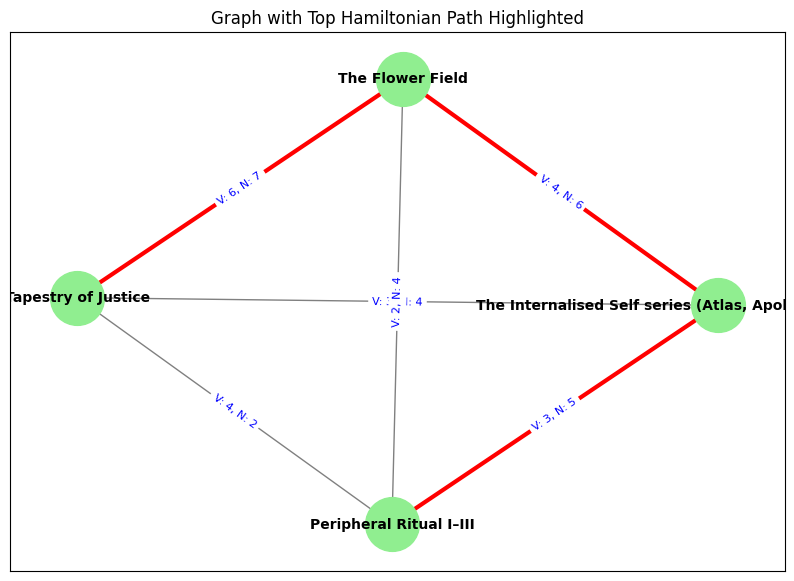

In [41]:
# Add the maximum hamiltonian path in order to make the top-n paths visiting all the nodes once.
from itertools import permutations

# Number of top paths to display
n = 3  # You can change 'n' to display more or fewer top paths

# Get the list of nodes (artworks)
nodes = list(G.nodes())

# Generate all possible permutations of the nodes (all possible Hamiltonian paths)
all_paths = list(permutations(nodes))

# For each permutation (path), compute the total 'overall_connectivity_score'
path_scores = []
for path in all_paths:
    total_score = 0
    valid_path = True
    # Iterate over consecutive pairs in the path
    for i in range(len(path) - 1):
        u = path[i]
        v = path[i + 1]
        if G.has_edge(u, v):
            total_score += G[u][v]['overall_connectivity_score']
        else:
            # If there is no edge between consecutive nodes, the path is invalid
            valid_path = False
            break
    if valid_path:
        path_scores.append((total_score, path))

# Sort the paths based on 'total_score' in descending order
path_scores.sort(reverse=True, key=lambda x: x[0])

# Print the top 'n' paths
print(f"\nTop {n} Hamiltonian paths:")
for i, (score, path) in enumerate(path_scores[:n]):
    print(f"Path {i + 1}: {' -> '.join(path)}")
    print(f"Total overall connectivity score: {score}\n")
# Get the top path
top_score, top_path = path_scores[0]

# Create a set of edges in the top path
top_edges = [(top_path[i], top_path[i + 1]) for i in range(len(top_path) - 1)]

# Draw the graph again, highlighting the top path
plt.figure(figsize=(10, 7))

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=1500, node_color='lightgreen')

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

# Draw all edges with default settings
nx.draw_networkx_edges(G, pos, edge_color='grey', width=1)

# Highlight edges in the top path
nx.draw_networkx_edges(
    G,
    pos,
    edgelist=top_edges,
    edge_color='red',
    width=3
)

# Add edge labels
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='blue', font_size=8)

plt.title("Graph with Top Hamiltonian Path Highlighted")
plt.show()


In [ ]:
#time to add keyframing and adding to thematic buckets
'''
now instead of of scoring all the art pieces, we categorise them into thematic buckets first. 
'''